In [20]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
plt.style.use('seaborn')

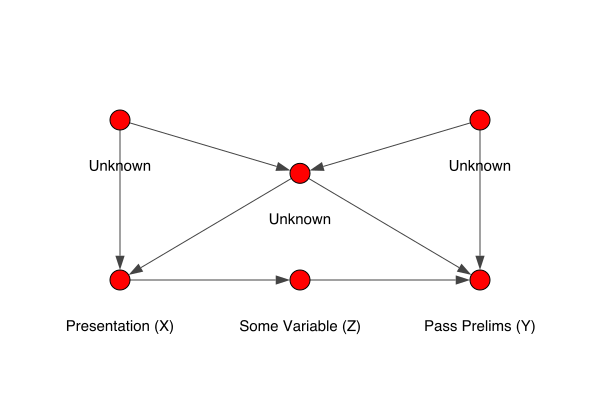

In [21]:
g = ig.Graph.Adjacency(np.array([[0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0],[0, 0, 0, 1, 1],[0, 0, 0, 0, 0, 1],[0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0]]).tolist())

g.vs['label'] = ['Unknown','Unknown','Unknown','Presentation (X)','Pass Prelims (Y)','Some Variable (Z)']
g.vs['label_size'] = 15
layout = [(0.0, 0.0), (3.0, 0), (1.5, 1), (0, 3), (3, 3), (1.5,3)]
ig.plot(g, 'Images/frontdoor_graph.png',layout=layout,vertex_label_dist=4,vertex_label_angle=4.712,bbox=(600, 400), margin=120)

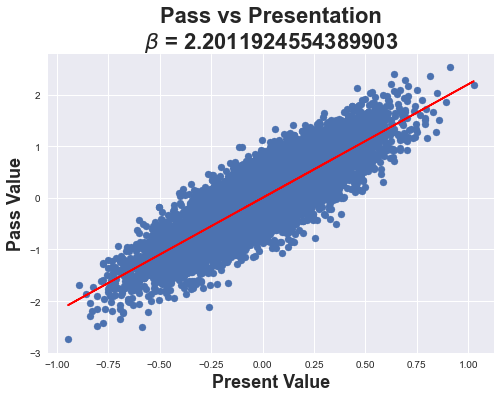

In [22]:
N = 10000

comm = np.random.normal(0,0.1,N)
tech = np.random.normal(0,0.1,N)
ex_able = comm + tech + np.random.normal(0,0.1,N)
present = ex_able + comm + np.random.normal(0,0.1,N)
var = 0.5 * present + np.random.normal(0,0.1,N)
pass_pre = 3 * var + ex_able + tech + np.random.normal(0,0.1,N)

fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

beta, b = np.polyfit(present, pass_pre, 1)

ax.scatter(present,pass_pre)
ax.set_title('Pass vs Presentation\n' + r'$\beta$ = {}'.format(beta),fontweight='bold',fontsize = 22)
ax.set_ylabel('Pass Value',fontweight='bold',fontsize = 18)
ax.set_xlabel('Present Value',fontweight='bold',fontsize = 18)
ax.plot(present, beta*present+b,c='r')
ax.grid(True)
fig.savefig('Images/frontdoor_1.png',bbox_inches='tight')

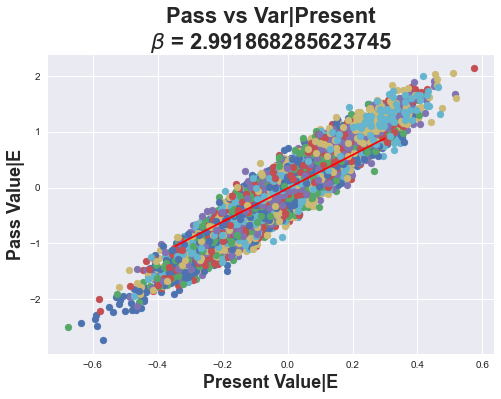

In [23]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

present_bins = np.digitize(present,np.linspace(-0.6,0.6,30) )

betas = np.empty((present_bins.max()))
var_means = np.empty((present_bins.max()))
b = np.empty((present_bins.max()))
betas[:] = np.nan
for i in range(present_bins.max()):
    indices = present_bins == i

    if indices.nonzero()[0].shape[0] == 0: continue

    betas[i], b[i] = np.polyfit(var[indices], pass_pre[indices], 1)
    var_means[i] = np.mean(var[indices])


    ax.scatter(var[indices], pass_pre[indices])


ax.set_title('Pass vs Var|Present\n' + r'$\beta$ = {}'.format(np.nanmean(betas,0)),fontweight='bold',fontsize = 22)
ax.set_ylabel('Pass Value|E',fontweight='bold',fontsize = 18)
ax.set_xlabel('Present Value|E',fontweight='bold',fontsize = 18)
ax.plot(var_means, np.nanmean(betas,0)*var_means+np.nanmean(b,0),c='r')
ax.grid(True)
fig.savefig('Images/frontdoor_2.png',bbox_inches='tight')

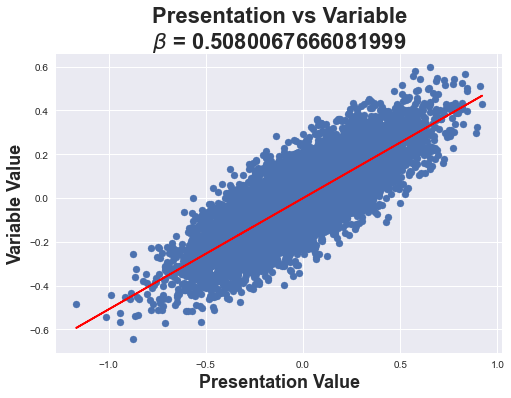

In [24]:
N = 10000

comm = np.random.normal(0,0.1,N)
tech = np.random.normal(0,0.1,N)
ex_able = comm + tech + np.random.normal(0,0.1,N)
present = ex_able + comm + np.random.normal(0,0.1,N)
var = 0.5 * present + np.random.normal(0,0.1,N)
pass_pre = 3 * var + ex_able + tech + np.random.normal(0,0.1,N)

fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

beta, b = np.polyfit(present, var, 1)

ax.scatter(present,var)
ax.set_title('Presentation vs Variable\n' + r'$\beta$ = {}'.format(beta),fontweight='bold',fontsize = 22)
ax.set_ylabel('Variable Value',fontweight='bold',fontsize = 18)
ax.set_xlabel('Presentation Value',fontweight='bold',fontsize = 18)
ax.plot(present, beta*present+b,c='r')
ax.grid(True)
fig.savefig('Images/frontdoor_3.png',bbox_inches='tight')